# Introduction

In this project, we use the machine learning workflow to predict a car's market price using its attributes. The data set we will be working with is called the Automobile Data Set from University of California, Irvine's Machine Learning Repository. The data set contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

Here is a link to the dataset: https://archive.ics.uci.edu/ml/datasets/automobile

## Exploring the Data Set

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 99

In [29]:
#column names don't match the ones in the dataset's documentation,
#so we must manually assign them
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [30]:
#checking which cols are numeric, and can be used as features
print(cars.info())
cars.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


**It seems like the following columns are continuous and can be used as features in the training set:**

In [31]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 
                          'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 
                          'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

car_fts = cars[continuous_values_cols]
car_fts.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

**Despite taking only the numeric columns, there still seems to be data cleaning that must be done. **

In [32]:
car_fts = car_fts.replace("?", np.nan)

#check
car_fts.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


**Because ? is a string value, columns containing this value were cast to the pandas object data type. These columns must be converted back to numeric types.**

In [33]:
car_fts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [34]:
#converting all columns to float type
car_fts = car_fts.astype('float')

#check if there are any null values
car_fts.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

**For columns with null values, we have three options:**

 - Replace the missing values using the average values from that column.
 - Drop the rows entirely.
 - Drop the column entirely.
 
Since the price is our target column, we will drop the 4 rows (~1% of the entries).

normalized-losses has null values in 20% of the rows, so we can't drop the rows. 

Instead of dropping more rows or columns, we will replace the missing values with averages from that column.

In [35]:
car_fts = car_fts.dropna(subset=['price'])
car_fts = car_fts.fillna(car_fts.mean())

#check
car_fts.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Finally, we normalize all the columns from 0 to 1, except the target column (price). We use the Z-score standardization method to preserve the variance.**

In [36]:
price = car_fts['price']
car_fts = (car_fts - car_fts.mean())/(car_fts.std())
car_fts['price'] = price

## Univariate K-Nearest Neighbors Models

We begin by creating a function, named knn_uni, that encapsulates the training and simple validation process. This function takes k = [1, 3, 5, 7, 9] values. We will then use this function to train and test univariate models using the different numeric columns in the data set, and compare the results of different k values via scatter plot.

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_uni(train_col, target_col, df):
    np.random.seed(1)
        
    #randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    #divide number of rows in half and round
    last_row = int(len(rand_df) / 2)
    
    #select the first half as training set
    #select the second half as test set
    train_df = rand_df.iloc[0:last_row]
    test_df = rand_df.iloc[last_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        #fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[[target_col]])
        
        #use model to predict price
        predicted = knn.predict(test_df[[train_col]])
        
        #compute MSE of actual vs. predicted
        mse = mean_squared_error(test_df[target_col], predicted)
        #take square root to get RMSE
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

#use each column as a train_col, use model and return k_rmses in a dictionary
train_cols = car_fts.columns.drop('price')
col_k_rmses = dict()
for col in train_cols:
    rmse = knn_uni(col, 'price', car_fts)
    col_k_rmses[col] = rmse

col_k_rmses  

{'normalized-losses': {1: 7779.606037519503,
  3: 7480.692360872743,
  5: 7337.2848203845515,
  7: 7795.000930504562,
  9: 7705.82454665913},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.490335934409,
  7: 5448.173408324034,
  9: 5738.621574471594},
 'length': {1: 4577.003915399697,
  3: 5087.460276710444,
  5: 5429.644739577333,
  7: 5307.702178308323,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.421075087697,
  5: 4772.510209128695,
  7: 4715.979827895643,
  9: 4736.091903473983},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8132.467731772246,
  7: 7704.344964170201,
  9: 7779.56469282989},
 'curb-weight': {1: 5288.0195725810245,
  3: 5011.8789151002,
  5: 4453.680702653493,
  7: 4330.149364501495,
  9: 4632.92525121302},
 'bore': {1: 8602.58848450066,
  3: 6977.123411794459,
  5: 6793.0574839170895,
  7: 6828.8678082042015,
  9: 6865.299025218018},
 'stroke': {1: 9116.495955406906,
  3: 7336.8141642206,
  5: 8006.096

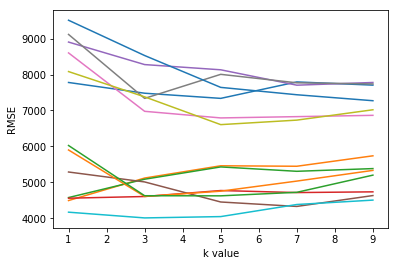

In [44]:
#visualize results via scatter plot
for key, value in col_k_rmses.items():
    x = list(value.keys())
    y = list(value.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [45]:
#compute average RMSE across different k values for each feature.
feature_avg_rmse = {}
for k,v in col_k_rmses.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4223.530357
width                4678.052063
curb-weight          4743.330761
highway-mpg          5040.509230
city-mpg             5126.515991
length               5156.973125
wheel-base           5252.436179
compression-rate     7164.249800
bore                 7213.387243
normalized-losses    7619.681739
stroke               7993.732370
peak-rpm             8078.822375
height               8159.606698
dtype: float64

## Multivariate K-Nearest Neighbors Models

We now modify knn_uni to work with multiple train (feature) columns, and multiple k values. We then train the model using combinations of the best features from above. 

In [53]:
def knn_multi(train_cols, target_col, df):
    np.random.seed(1)
        
    #randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    #divide number of rows in half and round
    last_row = int(len(rand_df) / 2)
    
    #select the first half as training set
    #select the second half as test set
    train_df = rand_df.iloc[0:last_row]
    test_df = rand_df.iloc[last_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        #fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        #use model to predict price
        predicted = knn.predict(test_df[train_cols])
        
        #compute MSE of actual vs. predicted
        mse = mean_squared_error(test_df[target_col], predicted)
        #take square root to get RMSE
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

cols_k_rmses = {}

two_best_features = ['horsepower', 'width']
rmse = knn_multi(two_best_features, 'price', car_fts)
cols_k_rmses["two best features"] = rmse

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse = knn_multi(three_best_features, 'price', car_fts)
cols_k_rmses["three best features"] = rmse

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse = knn_multi(four_best_features, 'price', car_fts)
cols_k_rmses["four best features"] = rmse

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse = knn_multi(five_best_features, 'price', car_fts)
cols_k_rmses["five best features"] = rmse

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse = knn_multi(six_best_features, 'price', car_fts)
cols_k_rmses["six best features"] = rmse

cols_k_rmses

{'two best features': {5: 3587.6781582974736},
 'three best features': {5: 3315.179311728235},
 'four best features': {5: 3280.4341586001833},
 'five best features': {5: 3346.3794863306603},
 'six best features': {5: 3633.1572673239607}}

**For the top 3 models (three, four and five best features) from above, we will vary the hyperparameter value (k value) from 1 to 25 and plot the resulting RMSE values.**

In [54]:
def knn_multi_hyper(train_cols, target_col, df):
    np.random.seed(1)
        
    #randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    #divide number of rows in half and round
    last_row = int(len(rand_df) / 2)
    
    #select the first half as training set
    #select the second half as test set
    train_df = rand_df.iloc[0:last_row]
    test_df = rand_df.iloc[last_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        #fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        #use model to predict price
        predicted = knn.predict(test_df[train_cols])
        
        #compute MSE of actual vs. predicted
        mse = mean_squared_error(test_df[target_col], predicted)
        #take square root to get RMSE
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

cols_k_rmses = {}

rmse = knn_multi_hyper(three_best_features, 'price', car_fts)
cols_k_rmses["three best features"] = rmse

rmse = knn_multi_hyper(four_best_features, 'price', car_fts)
cols_k_rmses["four best features"] = rmse

rmse = knn_multi_hyper(five_best_features, 'price', car_fts)
cols_k_rmses["five best features"] = rmse

cols_k_rmses

{'three best features': {1: 2672.757868525014,
  2: 2821.2015026078575,
  3: 3135.9799922115503,
  4: 3204.253321893626,
  5: 3315.179311728235,
  6: 3471.0681296102557,
  7: 3772.1919269737646,
  8: 3962.910759818426,
  9: 4094.247502193349,
  10: 4110.703779689852,
  11: 4251.77253798381,
  12: 4330.566366047584,
  13: 4298.8259862886025,
  14: 4271.101358982335,
  15: 4303.033919057443,
  16: 4390.435220626321,
  17: 4482.3351213269925,
  18: 4553.826750555413,
  19: 4598.342590974104,
  20: 4661.880403295297,
  21: 4739.054696356203,
  22: 4760.670773572162,
  23: 4822.08332792583,
  24: 4871.03296157791},
 'four best features': {1: 2544.734664921175,
  2: 2884.2236669320723,
  3: 2947.2851155351814,
  4: 3091.992490092291,
  5: 3280.4341586001833,
  6: 3529.971525189242,
  7: 3796.3071888581662,
  8: 3987.785977399869,
  9: 4052.446344043095,
  10: 4127.790864073028,
  11: 4173.539983371344,
  12: 4255.2864697493,
  13: 4335.243097922586,
  14: 4373.699244920388,
  15: 4439.949384

**Finally, let's plot the different k-values**

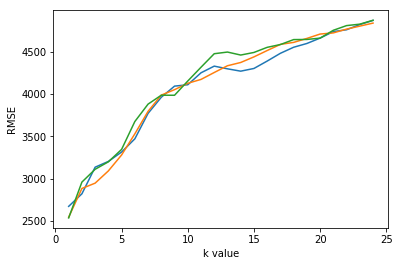

In [55]:
for key, value in cols_k_rmses.items():
    x = list(value.keys())
    y = list(value.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')